# Project - App Rating Prediction

Objective: Make a model to predict the app rating, with other information about the app provided.

Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

# 1. Import pandas and load the file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#To remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("googleplaystore.csv")

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2. Check for null values in the data. Get the number of null values for each column.

In [5]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Rating, Type,Content Rating,Current Ver and Android version are showing null values. Hence, we will drop them

# 3. Drop records with nulls in any of the columns.

In [6]:
new_data = data.dropna()

In [7]:
new_data.isna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,False,False,False,False,False,False,False,False,False,False,False,False,False
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


After dropping null values, save the data into new variable names new_data

# 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them.

## 4.1 Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

###     4.1.1 Extract the numeric value from the column

In [8]:
new_data['Size'] = new_data.Size.replace("Varies with device",np.nan)
new_data['Size'] = new_data.Size.str.replace("M","000") # All size values became the kilobyte type.
new_data['Size'] = new_data.Size.str.replace("k","")
new_data['Size'] = new_data.Size.replace("1,000+",1000)

### 4.1.2 Multiply the value by 1,000, if size is mentioned in Mb

In [9]:
new_data['Size'] = new_data['Size'].astype(float)
new_data['Size'].dtype

dtype('float64')

## 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to   numeric (int/float).

In [10]:
new_data["Reviews"] = new_data["Reviews"].astype(float)
new_data["Reviews"].dtype

dtype('float64')

## 4.3 Installs field is currently stored as string and has values like 1,000,000+. 

### 4.3.1 Treat 1,000,000+ as 1,000,000 and 4.3.2 remove ‘+’, ‘,’ from the field, convert it to integer

In [11]:
new_data["Installs"]=new_data.Installs.str.replace("+","")
new_data["Installs"]=new_data.Installs.str.replace(",","")

In [12]:
new_data["Installs"] = new_data["Installs"].astype(float)
new_data["Installs"].dtype

dtype('float64')

## 4.4 Price field is a string and has dollar symbol. Remove dollar sign, and convert it to numeric.

In [13]:
new_data["Price"]=new_data.Price.str.replace("$","")

In [14]:
new_data["Price"]=new_data["Price"].astype(float)
new_data["Price"].dtype

dtype('float64')

# 5 Sanity checks

## 5.1 Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [15]:
filter = (new_data.Rating<1) | (new_data.Rating>5)
print("Data Frame Size: ",new_data.shape, "Count of rows whose ratings are not between 1 and 5: ",filter.value_counts())

Data Frame Size:  (9360, 13) Count of rows whose ratings are not between 1 and 5:  False    9360
Name: Rating, dtype: int64


There is no need to drop any rows as average rating is between 1 and 5

## 5.2 Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [16]:
new_data =new_data[new_data["Reviews"]<=new_data["Installs"]]
new_data.shape

(9353, 13)

## 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [17]:
new_data.loc[(new_data.Type=="Free") & (new_data.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no values to drop, as for free apps, price is not greater than 0

# 6. Performing univariate analysis: 

## 6.1 Boxplot for Price

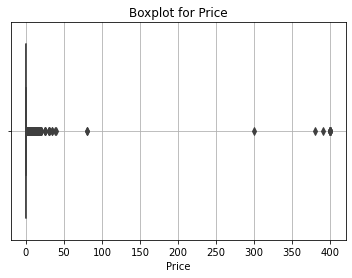

In [18]:
sns.boxplot(new_data.Price)

plt.title("Boxplot for Price")
plt.xlabel("Price")
plt.grid(linestyle = '-')

plt.show()

### Are there any outliers? Think about the price of usual apps on Play Store.

Yes there are outliers the rows with price greater than 250$ need to be removed.

## 6.2 Boxplot for Reviews

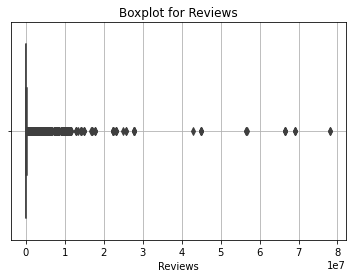

In [19]:
sns.boxplot(new_data.Reviews)

plt.title("Boxplot for Reviews")
plt.xlabel("Reviews")
plt.grid(linestyle = '-')

plt.show()

### Are there any apps with very high number of reviews? Do the values seem right?

Certainly yes, there are apps which have high number of reviews. Mostly apps have reviews between 0 & 1

## 6.3 Histogram for Rating

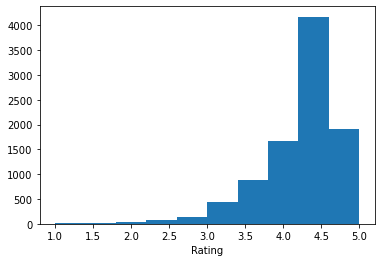

In [22]:
plt.hist(new_data.Rating)
plt.xlabel("Rating")
plt.show()

### How are the ratings distributed? Is it more toward higher ratings?

Ratings Distribution is left skewed, as most off the data falls to the right of the mean. Yes,the ratings are towards higher rating

## 6.4 Histogram for Size

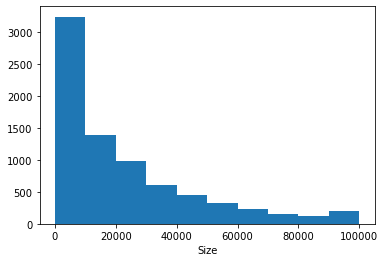

In [23]:
plt.hist(new_data.Size)
plt.xlabel("Size")
plt.show()

### Note down your observations for the plots made above. Which of these seem to have outliers?

Size distribution is right or positively skewed, as most of the data is towards the left of the mean.

# 7. Outlier treatment: 

## 7.1 Price: From the box plot, it seems like there are some apps with very high price. A price of 200 dollars for an application on the Play Store is very high and suspicious!

### Check out the records with very high price;Is 200 indeed a high price?;Drop these as most seem to be junk apps

In [22]:
new_data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

There are records with very high price; so we need to drop them

In [23]:
new_data = new_data.loc[(new_data.Price<200)]
new_data.shape

(9338, 13)

## 7.2 Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [24]:
new_data= new_data.loc[(new_data.Reviews<2000000)]
new_data.shape

(8885, 13)

## 7.3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

### Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99;Decide a threshold as cutoff for outlier and drop records having values more than that

In [25]:
new_data.Installs.quantile([0.10, 0.25, 0.50, 0.70, 0.90, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [26]:
new_data= new_data.loc[(new_data.Installs<10000000)]

In [27]:
new_data.shape

(7258, 13)

# 8. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.


## 8.1 Make scatter plot/joinplot for Rating vs. Price

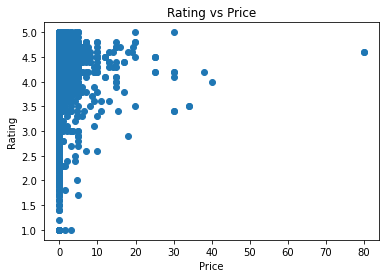

In [28]:
plt.scatter(x =new_data.Price, y =new_data.Rating)
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Rating vs Price")
plt.show()

### What pattern do you observe? Does rating increase with price?

No,Ratings does not increase with price

# 8.2 Make scatter plot/joinplot for Rating vs. Size

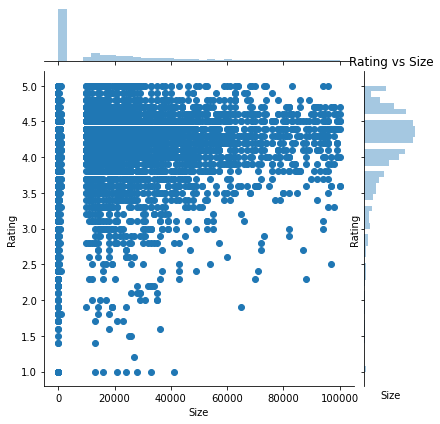

In [29]:
sns.jointplot(x ='Size', y ='Rating', data = new_data, kind ='scatter')
plt.xlabel("Size")
plt.ylabel("Rating")
plt.title("Rating vs Size")
plt.show()

### Are heavier apps rated better?

We can observe that heavier apps are having higher rating 

# 8.3 Make scatter plot/joinplot for Rating vs. Reviews

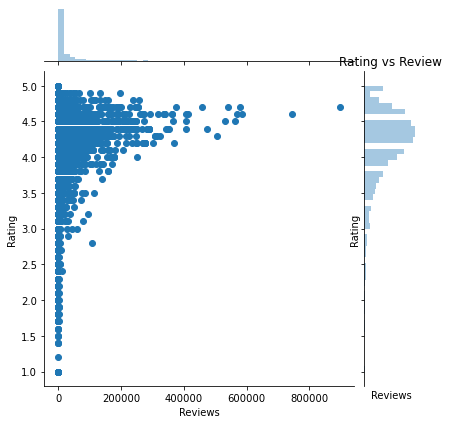

In [30]:
sns.jointplot(x ='Reviews', y ='Rating', data = new_data,kind ='scatter')
plt.xlabel("Reviews")
plt.ylabel("Rating")
plt.title("Rating vs Review")

plt.show()

## Does more review mean a better rating always?

Scatter plot indicate higher rating for apps having Max reviews. But this cannot be always it could be an outlier

# 8.4 Make boxplot for Rating vs. Content Rating

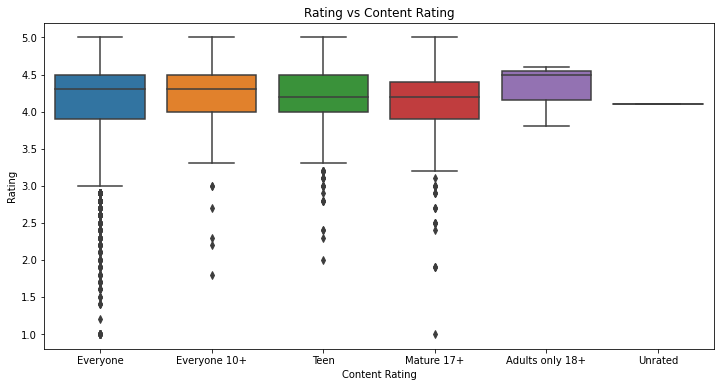

In [31]:
plt.figure(figsize=[12,6])
sns.boxplot(y= "Rating", x= "Content Rating", data=new_data)
plt.title("Rating vs Content Rating")
plt.show()

### Is there any difference in the ratings? Are some types liked better?

Not much conclusion could be drawn as the plot is almost same for Content Ratings.

# 8.5 Make boxplot for Ratings vs. Category

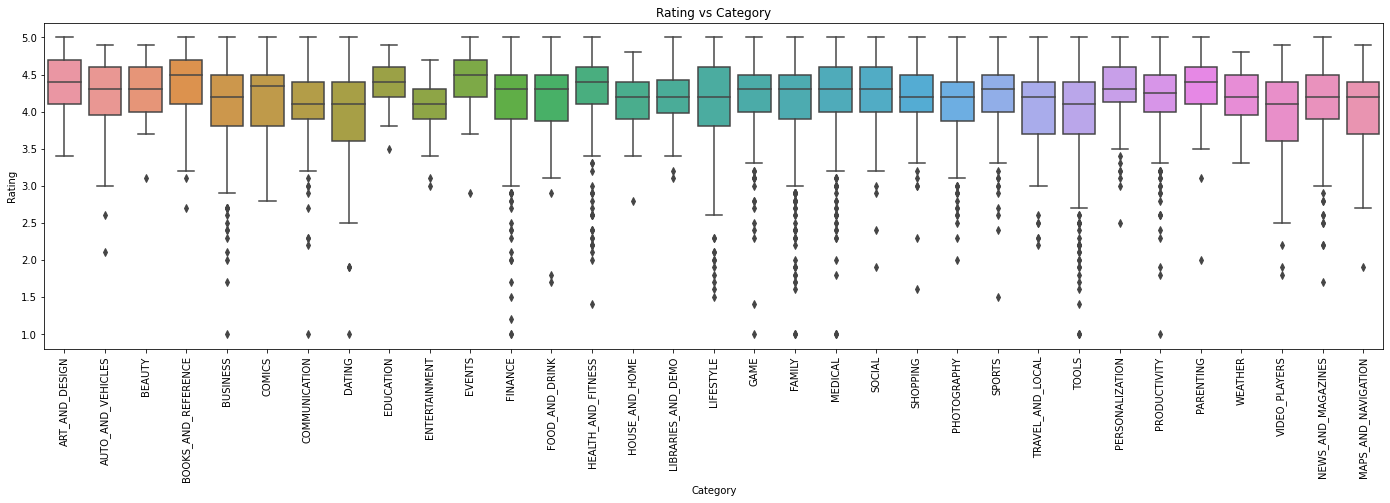

In [32]:
plt.subplots(figsize=(24,6))

sns.boxplot(y="Rating",x="Category",data=new_data)
plt.title("Rating vs Category")
plt.xticks(rotation = 90)
plt.show()

### Which genre has the best ratings?

Art_and_Design and events

# 9. Data preprocessing

### For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

In [33]:
inp1 = new_data.copy()
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


## 9.1 Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [34]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.7,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.8,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5.6,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


# 9.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [35]:
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"],axis=1,inplace=True)
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8.7,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2.8,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5.6,10.819798,Free,0.0,Everyone,Art & Design


# 9.3 Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
cat=inp1[['Category','Genres','Content Rating','Type']].apply(le.fit_transform)
inp1.drop(["Category","Genres","Content Rating","Type"],axis=1,inplace=True)
inp2 = pd.concat([inp1,cat],axis=1).copy()
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category,Genres,Content Rating,Type
0,4.1,5.075174,19000.0,9.210440,0.0,0,8,1,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,10,1,0
2,4.7,11.379520,8.7,15.424949,0.0,0,8,1,0
4,4.3,6.875232,2.8,11.512935,0.0,0,9,1,0
5,4.4,5.123964,5.6,10.819798,0.0,0,8,1,0


In [38]:
inp2.isna().sum()

Rating              0
Reviews             0
Size              769
Installs            0
Price               0
Category            0
Genres              0
Content Rating      0
Type                0
dtype: int64

In [39]:
inp2 = inp2.dropna()

# 10. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [40]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(inp2,test_size = 0.30,random_state=40)

# 11. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [41]:
y_train=df_train.pop('Rating')
X_train=df_train
y_test=df_test.pop('Rating')
X_test=df_test

# 12. Model building

### Use linear regression as the technique Report the R2 on the train set

In [42]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

from sklearn.metrics import r2_score
y_train_predict=lm.predict(X_train)
r2_score(y_train,y_train_predict)


0.09995364825387587

# 13. Make predictions on test set and report R2.

In [43]:
y_test_prect=lm.predict(X_test)
r2_score(y_test,X_test_prect)

0.10509051754196752